In [8]:
import torch
import torchvision
import torchvision.transforms as transforms

Set up data loaders

In [9]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Use Matplot lib to see a few data examples

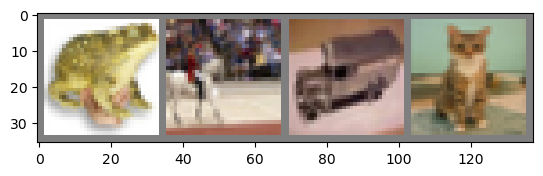

frog  horse truck cat  


In [10]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)


# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Let us understand the shapes of the data
First let us look at the images structures

In [11]:
print("images shape: ", images.shape)


images shape:  torch.Size([4, 3, 32, 32])


Images is a batch of 4 images. An each image has a shape of 3 x 32 x 32. Let us look in more detail

In [12]:
temp = images[0]
print("temp: ", temp.shape)

temp:  torch.Size([3, 32, 32])


In [13]:
print("temp.view(-1).shape: ", temp.view(-1).shape)


temp.view(-1).shape:  torch.Size([3072])


In [14]:
print(images.view(-1, 3072).shape)

torch.Size([4, 3072])


In [15]:
import torch.nn as nn

class FCModel (nn.Module):
    def __init__(self, input_size):
        super(FCModel, self).__init__()
        self.layer1 = nn.Linear(input_size, 30)
        self.layer2 = nn.Linear(30, 10)
        self.activation1 = nn.ReLU()
        self.out_activation = nn.Softmax(dim=1)

    def forward(self, x):
        #print("forward shape: ", x.shape)
        x = x.view(-1, 3072)
        #x = torch.flatten(x)

        #print("forward shape: ", x.shape)

        x = self.layer1(x)
        x = self.activation1(x)
        x = self.layer2(x)
        x = self.out_activation(x)
        return x

nnet = FCModel(3072)


In [16]:
from torchinfo import summary

batch_size = 64 #for illustration

summary(nnet, input_size=(batch_size, 3, 32, 32), device='cpu', col_names=['input_size', 'output_size',
                                                                           'num_params'])

/Users/manuelrodriguez/miniconda3/envs/pytorch2/lib/python3.8/site-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/Users/manuelrodriguez/miniconda3/envs/pytorch2/lib/python3.8/site-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
FCModel                                  [64, 3, 32, 32]           [64, 10]                  --
├─Linear: 1-1                            [64, 3072]                [64, 30]                  92,190
├─ReLU: 1-2                              [64, 30]                  [64, 30]                  --
├─Linear: 1-3                            [64, 30]                  [64, 10]                  310
├─Softmax: 1-4                           [64, 10]                  [64, 10]                  --
Total params: 92,500
Trainable params: 92,500
Non-trainable params: 0
Total mult-adds (M): 5.92
Input size (MB): 0.79
Forward/backward pass size (MB): 0.02
Params size (MB): 0.37
Estimated Total Size (MB): 1.18

In [17]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(nnet.parameters(), lr=0.01)

In [18]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = nnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.246
[1,  4000] loss: 2.171
[1,  6000] loss: 2.122
[1,  8000] loss: 2.102
[1, 10000] loss: 2.087
[1, 12000] loss: 2.086
[2,  2000] loss: 2.070
[2,  4000] loss: 2.062
[2,  6000] loss: 2.061
[2,  8000] loss: 2.063
[2, 10000] loss: 2.050
[2, 12000] loss: 2.048
[3,  2000] loss: 2.030
[3,  4000] loss: 2.030
[3,  6000] loss: 2.037
[3,  8000] loss: 2.035
[3, 10000] loss: 2.024
[3, 12000] loss: 2.031
[4,  2000] loss: 2.012
[4,  4000] loss: 2.015
[4,  6000] loss: 2.019
[4,  8000] loss: 2.017
[4, 10000] loss: 2.011
[4, 12000] loss: 2.003
[5,  2000] loss: 2.005
[5,  4000] loss: 1.996
[5,  6000] loss: 1.997
[5,  8000] loss: 2.005
[5, 10000] loss: 1.998
[5, 12000] loss: 1.999
[6,  2000] loss: 1.986
[6,  4000] loss: 1.994
[6,  6000] loss: 1.986
[6,  8000] loss: 1.987
[6, 10000] loss: 1.987
[6, 12000] loss: 1.988
[7,  2000] loss: 1.978
[7,  4000] loss: 1.978
[7,  6000] loss: 1.987
[7,  8000] loss: 1.974
[7, 10000] loss: 1.975
[7, 12000] loss: 1.986
[8,  2000] loss: 1.962
[8,  4000] 

In [19]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = nnet(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 45 %
